# Importing Essential Libraries

In [79]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [80]:
# Import datasets
data = pd.read_csv('imdb_top_2000_movies.csv')
data.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [81]:
# Remove all commas
data['Votes'] = data['Votes'].str.replace(',', '')
# Remove $ sign and M symbol and convert to float
data['Gross'] = data['Gross'].str.replace('$', '')
data['Gross'] = data['Gross'].str.replace('M', '')
data['Gross'] = data['Gross'].astype(float)
data['Gross'] = data['Gross'] * (10 ** 6)
df = pd.DataFrame(data)

In [82]:
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134970000.0
1,The Godfather Part II,1974,202,9.0,90.0,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,57300000.0
2,Ordinary People,1980,124,7.7,86.0,56476,Drama,Robert Redford,Donald Sutherland,54800000.0
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,44820000.0
4,Straw Dogs,1971,113,7.4,73.0,64331,"Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,66235,"Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,11000000.0
1996,Tooth Fairy,I 2010,101,5.0,36.0,49527,"Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,60020000.0
1997,The Informant!,2009,108,6.5,66.0,67318,"Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,33310000.0
1998,Youth in Revolt,2009,90,6.4,63.0,75956,"Comedy, Drama, Romance",Miguel Arteta,Michael Cera,15280000.0


In [83]:
df.describe()

,Duration,IMDB Rating,Metascore,Gross
count,2000.000000,2000.000000,1919.000000,1.903000e+03
mean,113.939000,6.922600,61.044294,6.618636e+07
std,22.946035,0.955618,17.937722,7.282108e+07
min,50.000000,1.500000,9.000000,0.000000e+00
25%,98.000000,6.400000,48.000000,1.822000e+07
50%,110.000000,7.000000,61.000000,4.482000e+07
75%,125.000000,7.600000,74.000000,8.707000e+07
max,271.000000,9.300000,100.000000,7.605100e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  2000 non-null   object 
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     1919 non-null   float64
 5   Votes         2000 non-null   object 
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 156.4+ KB


In [8]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)
print(data.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2000, 10)
Movie Name       object
Release Year     object
Duration          int64
IMDB Rating     float64
Metascore       float64
Votes            object
Genre            object
Director         object
Cast             object
Gross           float64
dtype: object


In [9]:
# Drop columns
df = df.drop(['Genre', 'Director', 'Cast'], axis=1)
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Gross
0,The Godfather,1972,175,9.2,100.0,2002655,134970000.0
1,The Godfather Part II,1974,202,9.0,90.0,1358608,57300000.0
2,Ordinary People,1980,124,7.7,86.0,56476,54800000.0
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,44820000.0
4,Straw Dogs,1971,113,7.4,73.0,64331,NaN
...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,66235,11000000.0
1996,Tooth Fairy,I 2010,101,5.0,36.0,49527,60020000.0
1997,The Informant!,2009,108,6.5,66.0,67318,33310000.0
1998,Youth in Revolt,2009,90,6.4,63.0,75956,15280000.0


<Axes: >

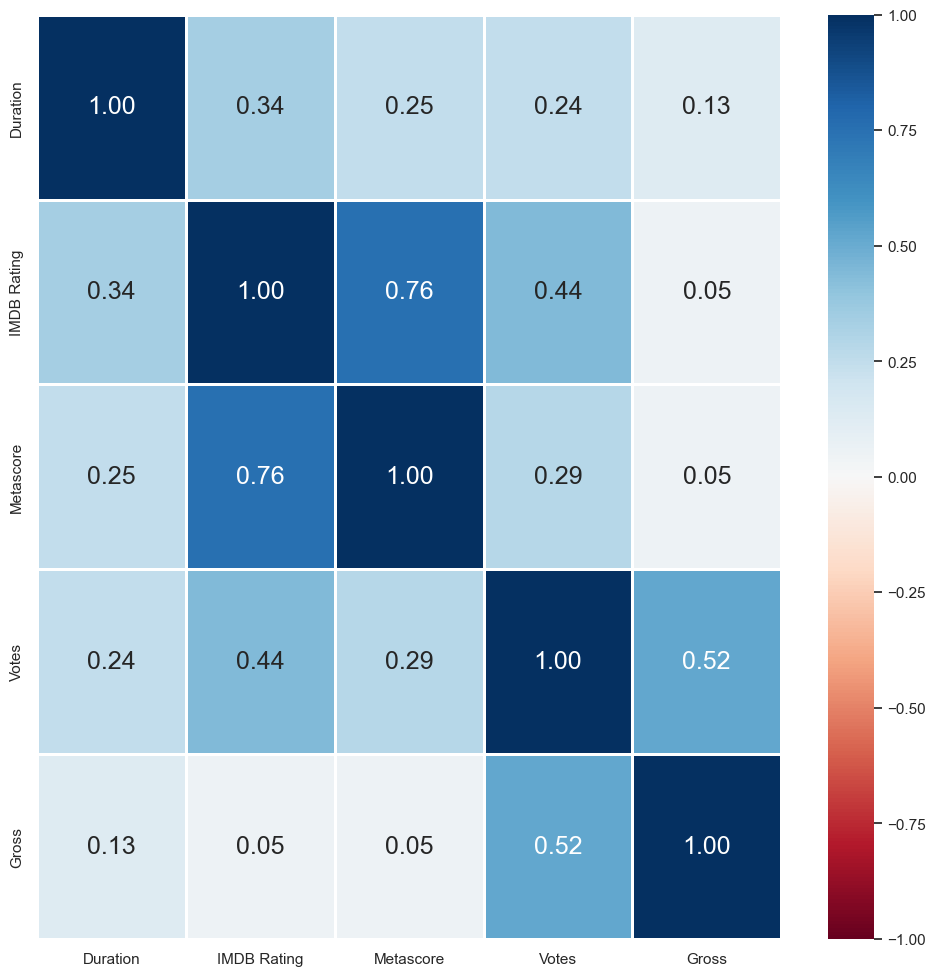

In [10]:
corr=pd.DataFrame(df[['Duration', 'IMDB Rating', 'Metascore', 'Votes', 'Gross']])
f = plt.figure(figsize=(12, 12))
sb.heatmap(corr.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

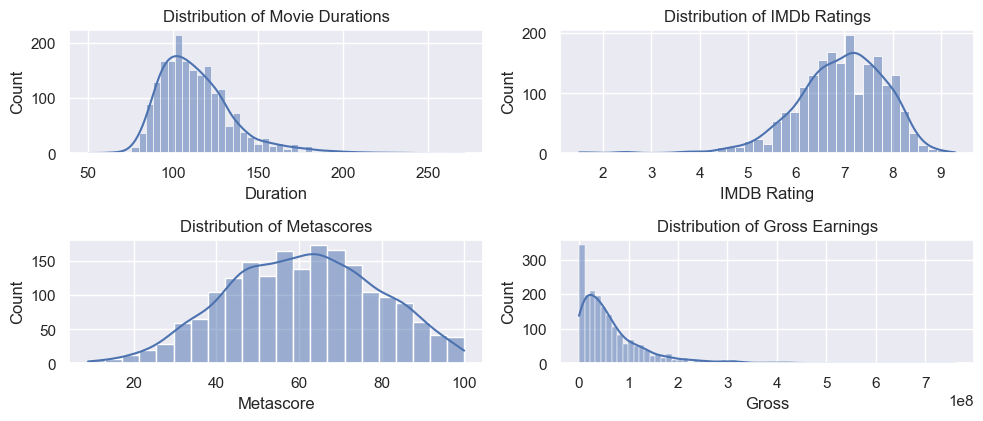

In [45]:
# Histograms/Distribution Plots
plt.figure(figsize=(10, 6))
plt.subplot(3, 2, 1)
sb.histplot(data['Duration'], kde=True)
plt.title('Distribution of Movie Durations')

plt.subplot(3, 2, 2)
sb.histplot(data['IMDB Rating'], kde=True)
plt.title('Distribution of IMDb Ratings')

plt.subplot(3, 2, 3)
sb.histplot(data['Metascore'].dropna(), kde=True)
plt.title('Distribution of Metascores')

plt.subplot(3, 2, 4)
sb.histplot(data['Gross'].dropna(), kde=True)
plt.title('Distribution of Gross Earnings')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of Release Years')

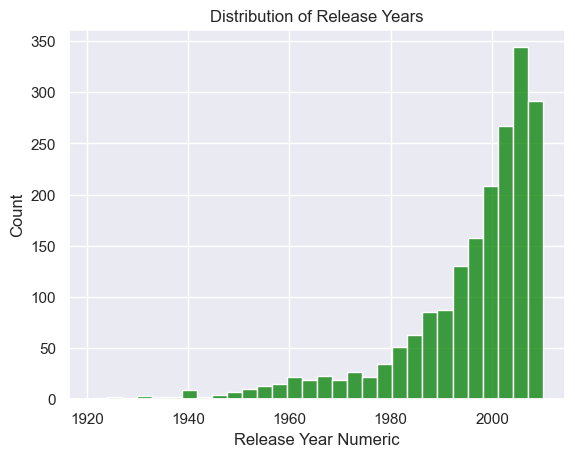

In [12]:
df['Release Year Numeric'] = pd.to_numeric(df['Release Year'], errors='coerce')

# Dropping NaN values in 'Release Year Numeric' for plotting
release_year_plot_data = df.dropna(subset=['Release Year Numeric'])
sb.histplot(release_year_plot_data['Release Year Numeric'], bins=30, color='green')
plt.title('Distribution of Release Years')

C:\Users\firef\AppData\Local\Temp\ipykernel_18904\3489949454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


Text(0.5, 1.0, 'Top 10 Genres')

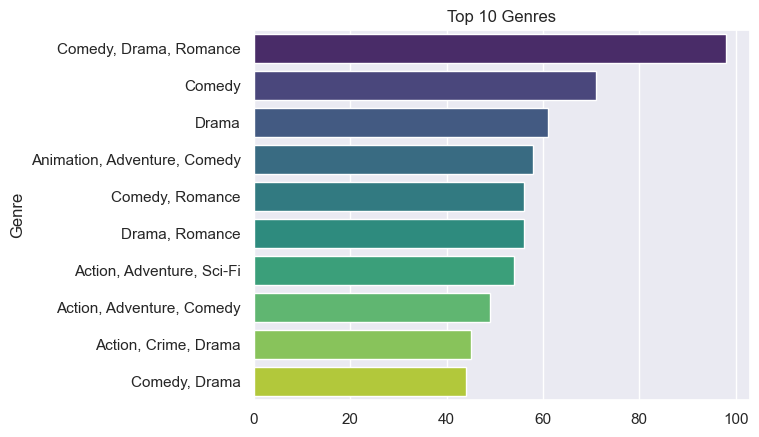

In [40]:
top_genres = data['Genre'].value_counts().head(10)
sb.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres')

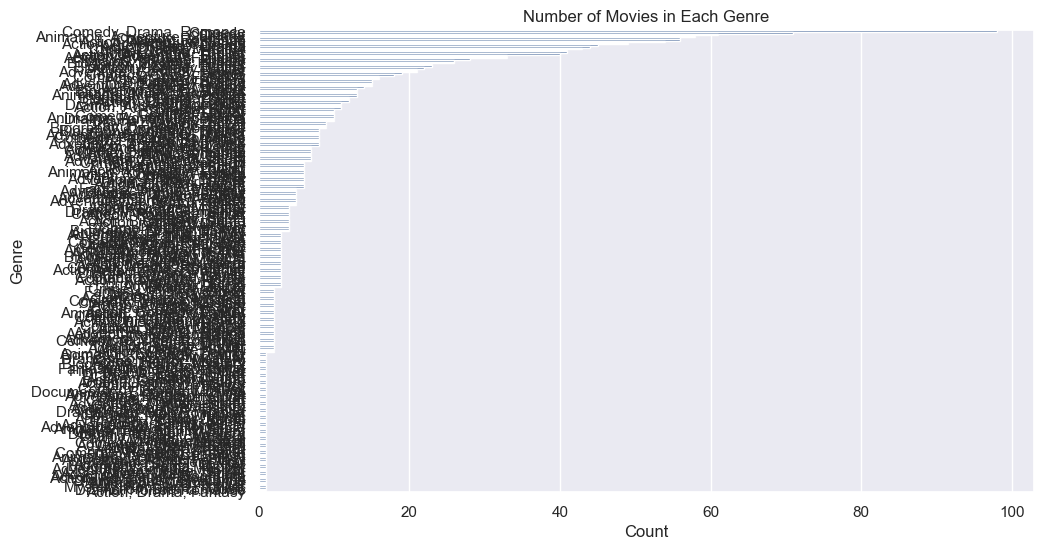

In [14]:
# Bar Plot for Movie Genres
plt.figure(figsize=(10, 6))
sb.countplot(y=data['Genre'], order=data['Genre'].value_counts().index)
plt.title('Number of Movies in Each Genre')
plt.xlabel('Count')
plt.show()


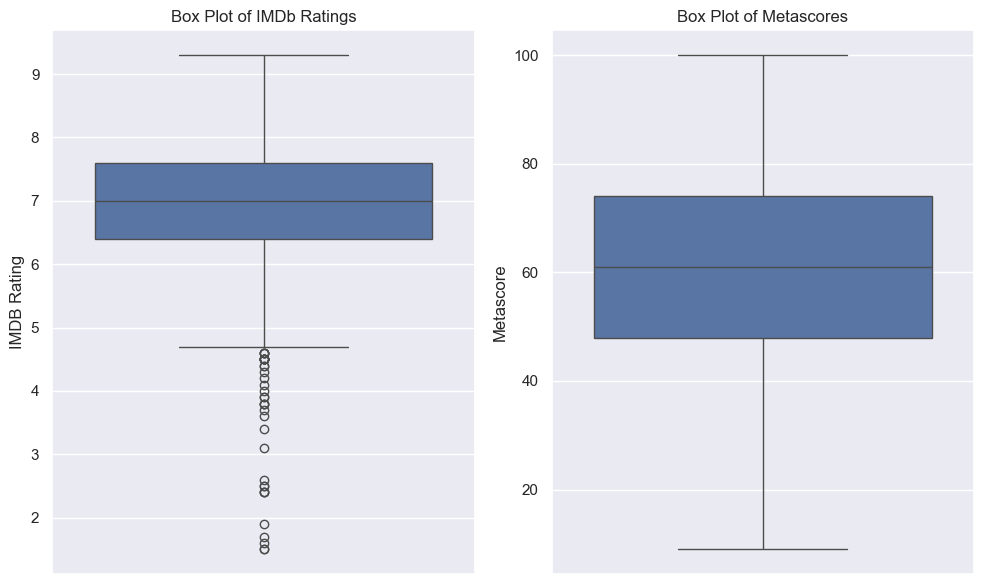

In [15]:
# Box Plot for IMDb Ratings and Metascores
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sb.boxplot(y=data['IMDB Rating'])
plt.title('Box Plot of IMDb Ratings')

plt.subplot(1, 2, 2)
sb.boxplot(y=data['Metascore'])
plt.title('Box Plot of Metascores')
plt.tight_layout()
plt.show()


In [16]:
Rating = pd.DataFrame(data['IMDB Rating'])
Metascore = pd.DataFrame(data['Metascore'])

print("IMDB Rating DataFrame:")
print("Number of entries:", Rating.shape[0])
print("Mean IMDb Rating:", Rating.mean())
print("Median IMDb Rating:", Rating.median())
print("Standard Deviation of IMDb Rating:", Rating.std())

print("\nMetascore DataFrame:")
print("Number of entries:", Metascore.shape[0])
print("Mean Metascore:", Metascore.mean())
print("Median Metascore:", Metascore.median())
print("Standard Deviation of Metascore:", Metascore.std())

IMDB Rating DataFrame:
Number of entries: 2000
Mean IMDb Rating: IMDB Rating    6.9226
dtype: float64
Median IMDb Rating: IMDB Rating    7.0
dtype: float64
Standard Deviation of IMDb Rating: IMDB Rating    0.955618
dtype: float64

Metascore DataFrame:
Number of entries: 2000
Mean Metascore: Metascore    61.044294
dtype: float64
Median Metascore: Metascore    61.0
dtype: float64
Standard Deviation of Metascore: Metascore    17.937722
dtype: float64


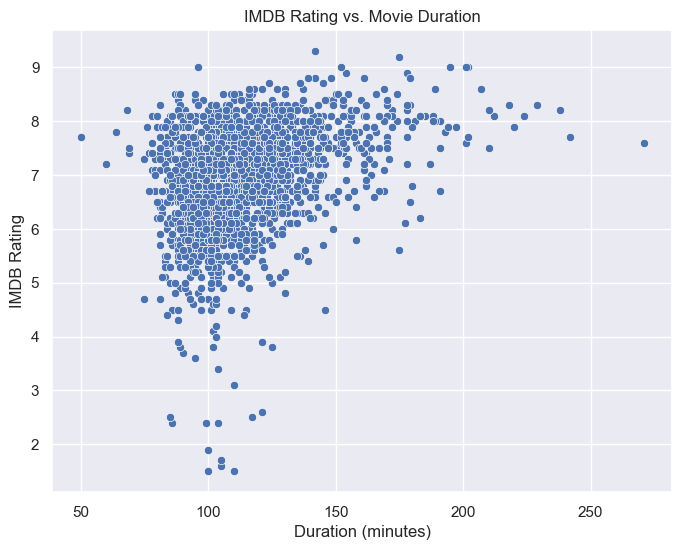

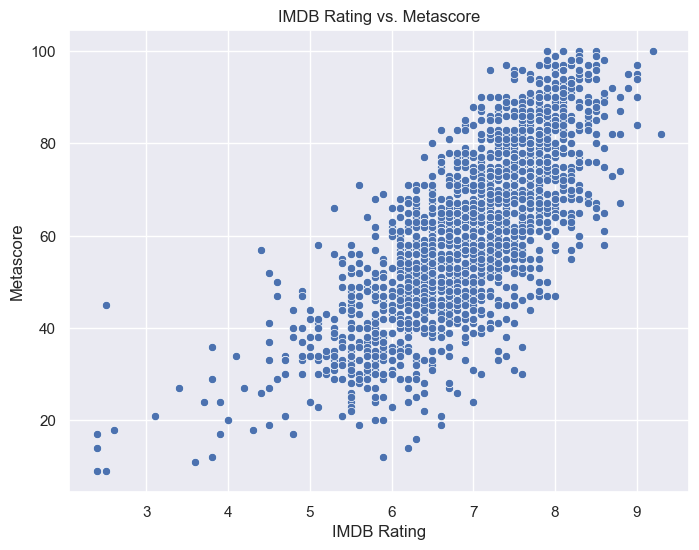

In [17]:
# Scatter Plot of IMDb Ratings vs. Movie Durations
plt.figure(figsize=(8, 6))
sb.scatterplot(x='Duration', y='IMDB Rating', data=data)
plt.title('IMDB Rating vs. Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDB Rating')
plt.show()

# Scatter Plot of IMDb Ratings vs. Metascores
plt.figure(figsize=(8, 6))
sb.scatterplot(x='IMDB Rating', y='Metascore', data=data.dropna(subset=['Metascore']))
plt.title('IMDB Rating vs. Metascore')
plt.xlabel('IMDB Rating')
plt.ylabel('Metascore')
plt.show()

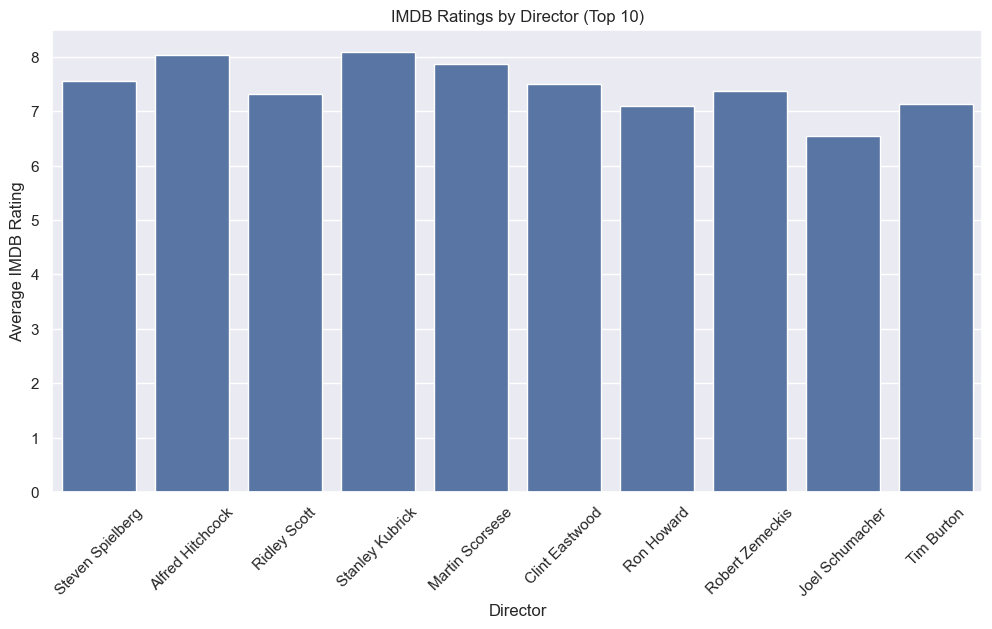

In [49]:
# Bar Plot for IMDb Ratings by Director
plt.figure(figsize=(12, 6))
top_directors = data['Director'].value_counts().head(10).index
sb.barplot(x='Director', y='IMDB Rating', data=data[data['Director'].isin(top_directors)], errorbar=None)
plt.title('IMDB Ratings by Director (Top 10)')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()

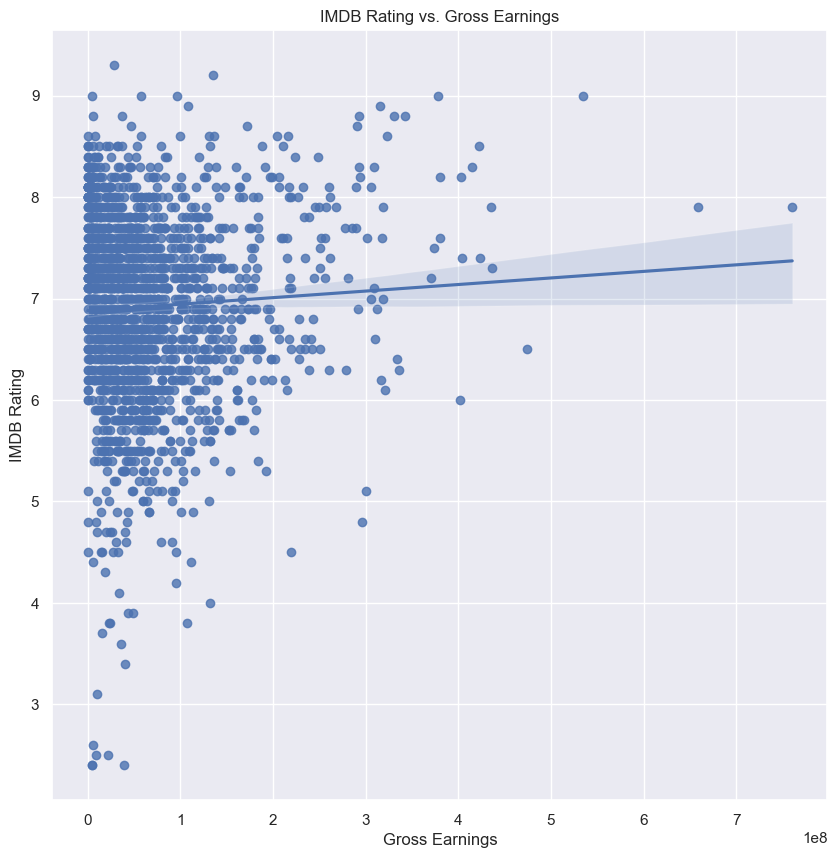

In [19]:
# Regression Plot of IMDb Ratings vs. Gross Earnings
plt.figure(figsize=(10,10))
sb.regplot(x='Gross', y='IMDB Rating', data=data.dropna(subset=['Gross']))
plt.title('IMDB Rating vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('IMDB Rating')
plt.show()

# Regression

## Multi-Variate Classificatoion tree

Intercept of Regression 	: b =  [4.60511406]
Coefficients of Regression 	: a =  [[0.03821605]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5752515372374262
Mean Squared Error (MSE) 	: 0.3510814168636291

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.560620391490636
Mean Squared Error (MSE) 	: 0.37708827607197076



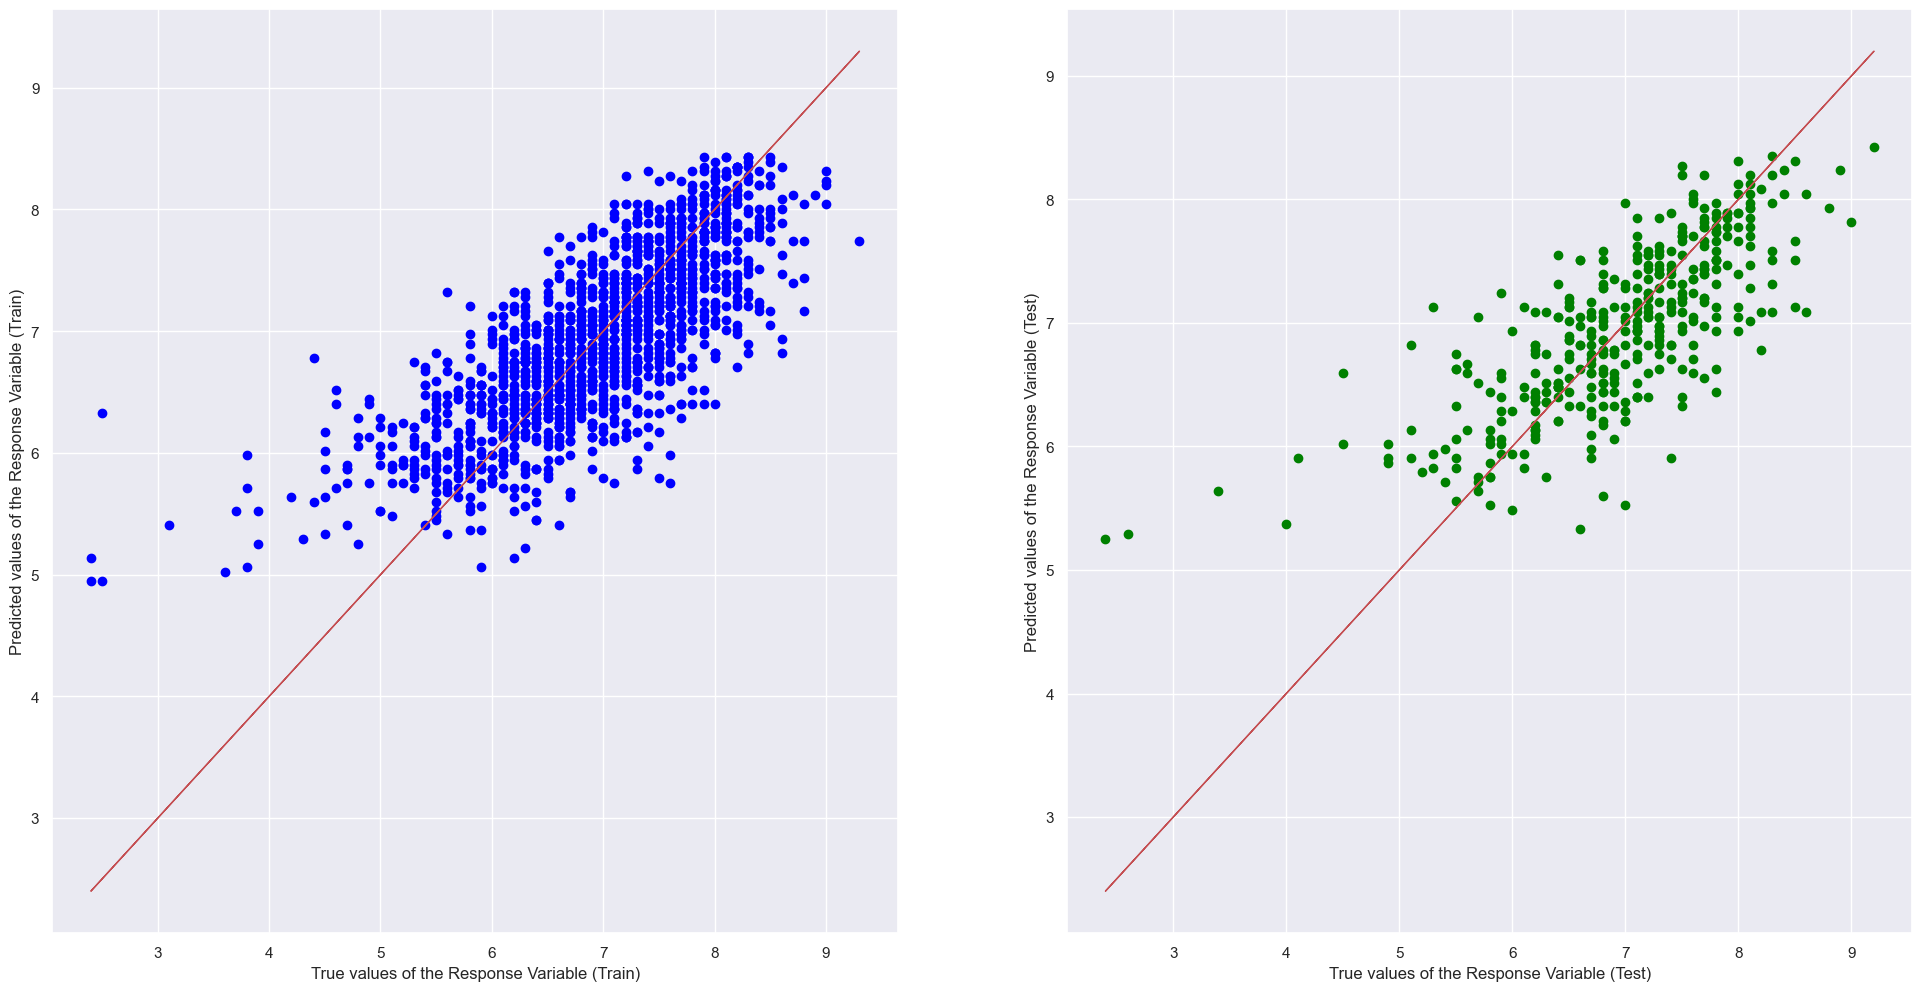

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

merged = pd.DataFrame(data[['IMDB Rating', 'Metascore']])
merged = merged.dropna(axis=0)
imdb_rating = pd.DataFrame(merged['IMDB Rating'])
metascore = pd.DataFrame(merged['Metascore'])

X_train, X_test, y_train, y_test = train_test_split(metascore, imdb_rating, test_size = 0.2)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [91]:
merged

,IMDB Rating,Metascore
0,9.2,100.0
1,9.0,90.0
2,7.7,86.0
3,8.3,100.0
4,7.4,73.0
...,...,...
1995,7.2,64.0
1996,5.0,36.0
1997,6.5,66.0
1998,6.4,63.0


<Axes: xlabel='IMDB Rating', ylabel='Metascore'>

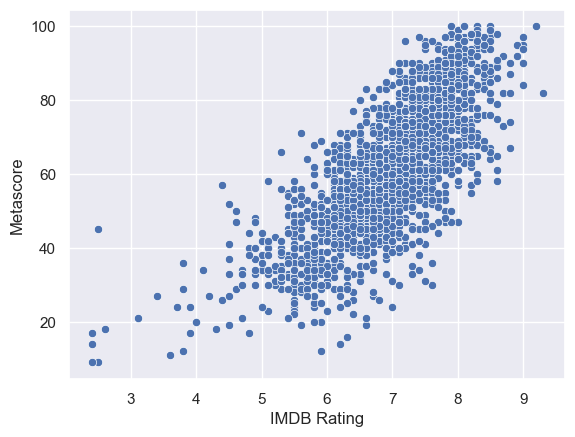

In [92]:
sb.scatterplot(data=merged, x='IMDB Rating', y='Metascore')

Intercept of Regression 	: b =  [6.59972364]
Coefficients of Regression 	: a =  [[1.47145106e-06]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.19843875065531702
Mean Squared Error (MSE) 	: 0.7109609535416781

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1700050486704845
Mean Squared Error (MSE) 	: 0.8416372386371301



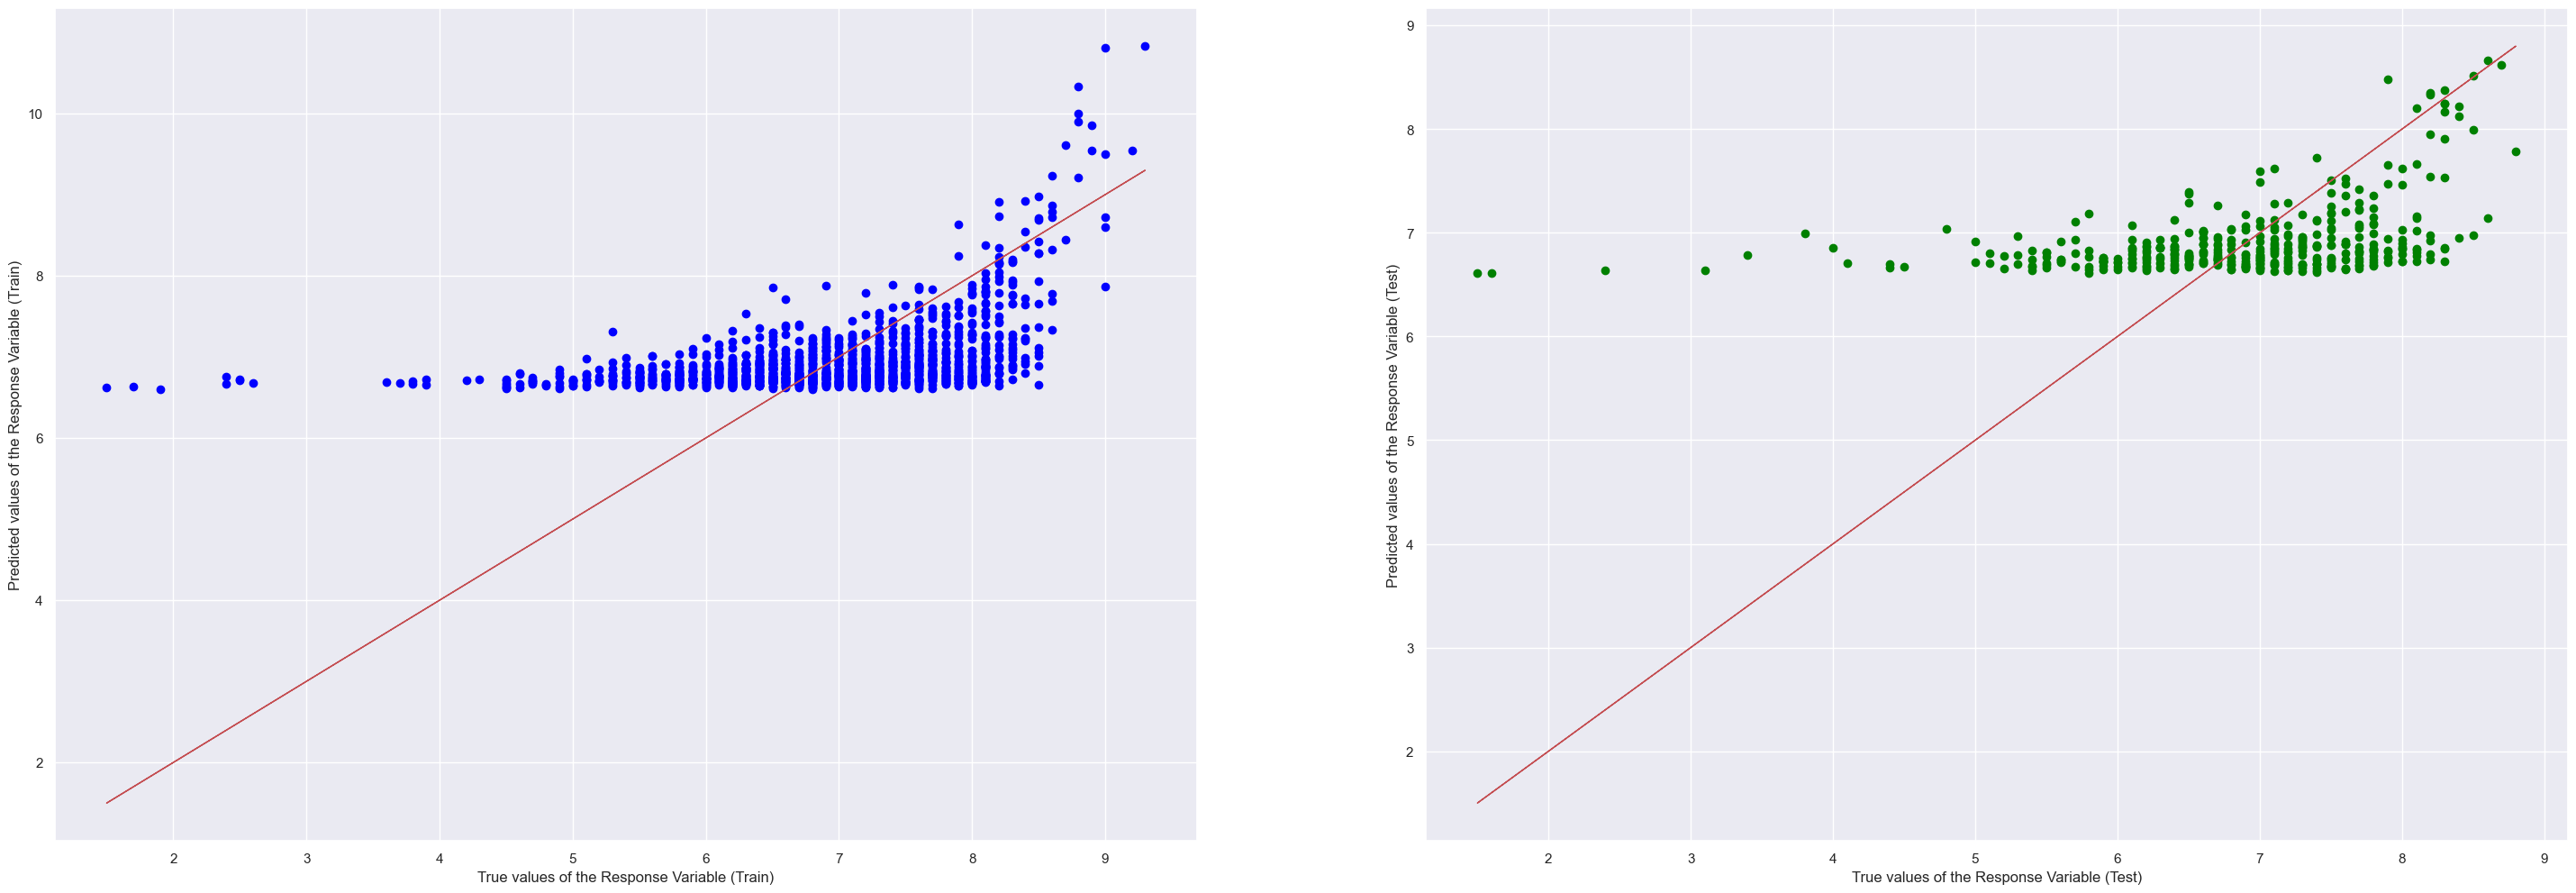

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

merged = pd.DataFrame(data[['IMDB Rating', 'Votes']])
merged = merged.dropna(axis=0)
imdb_rating = pd.DataFrame(merged['IMDB Rating'])
votes = pd.DataFrame(merged['Votes'])

X_train, X_test, y_train, y_test = train_test_split(votes, imdb_rating, test_size = 0.2)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(36, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

<Axes: xlabel='IMDB Rating', ylabel='Votes'>

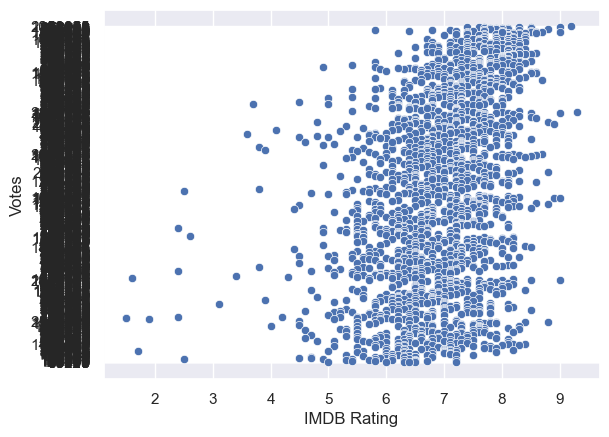

In [118]:
sb.scatterplot(data=merged, x='IMDB Rating', y='Votes')

Intercept of Regression 	: b =  [60580423.8726799]
Coefficients of Regression 	: a =  [[130361.91734001]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0009559020804640328
Mean Squared Error (MSE) 	: 5561017976529359.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.0026978535641830614
Mean Squared Error (MSE) 	: 4412831345606561.5



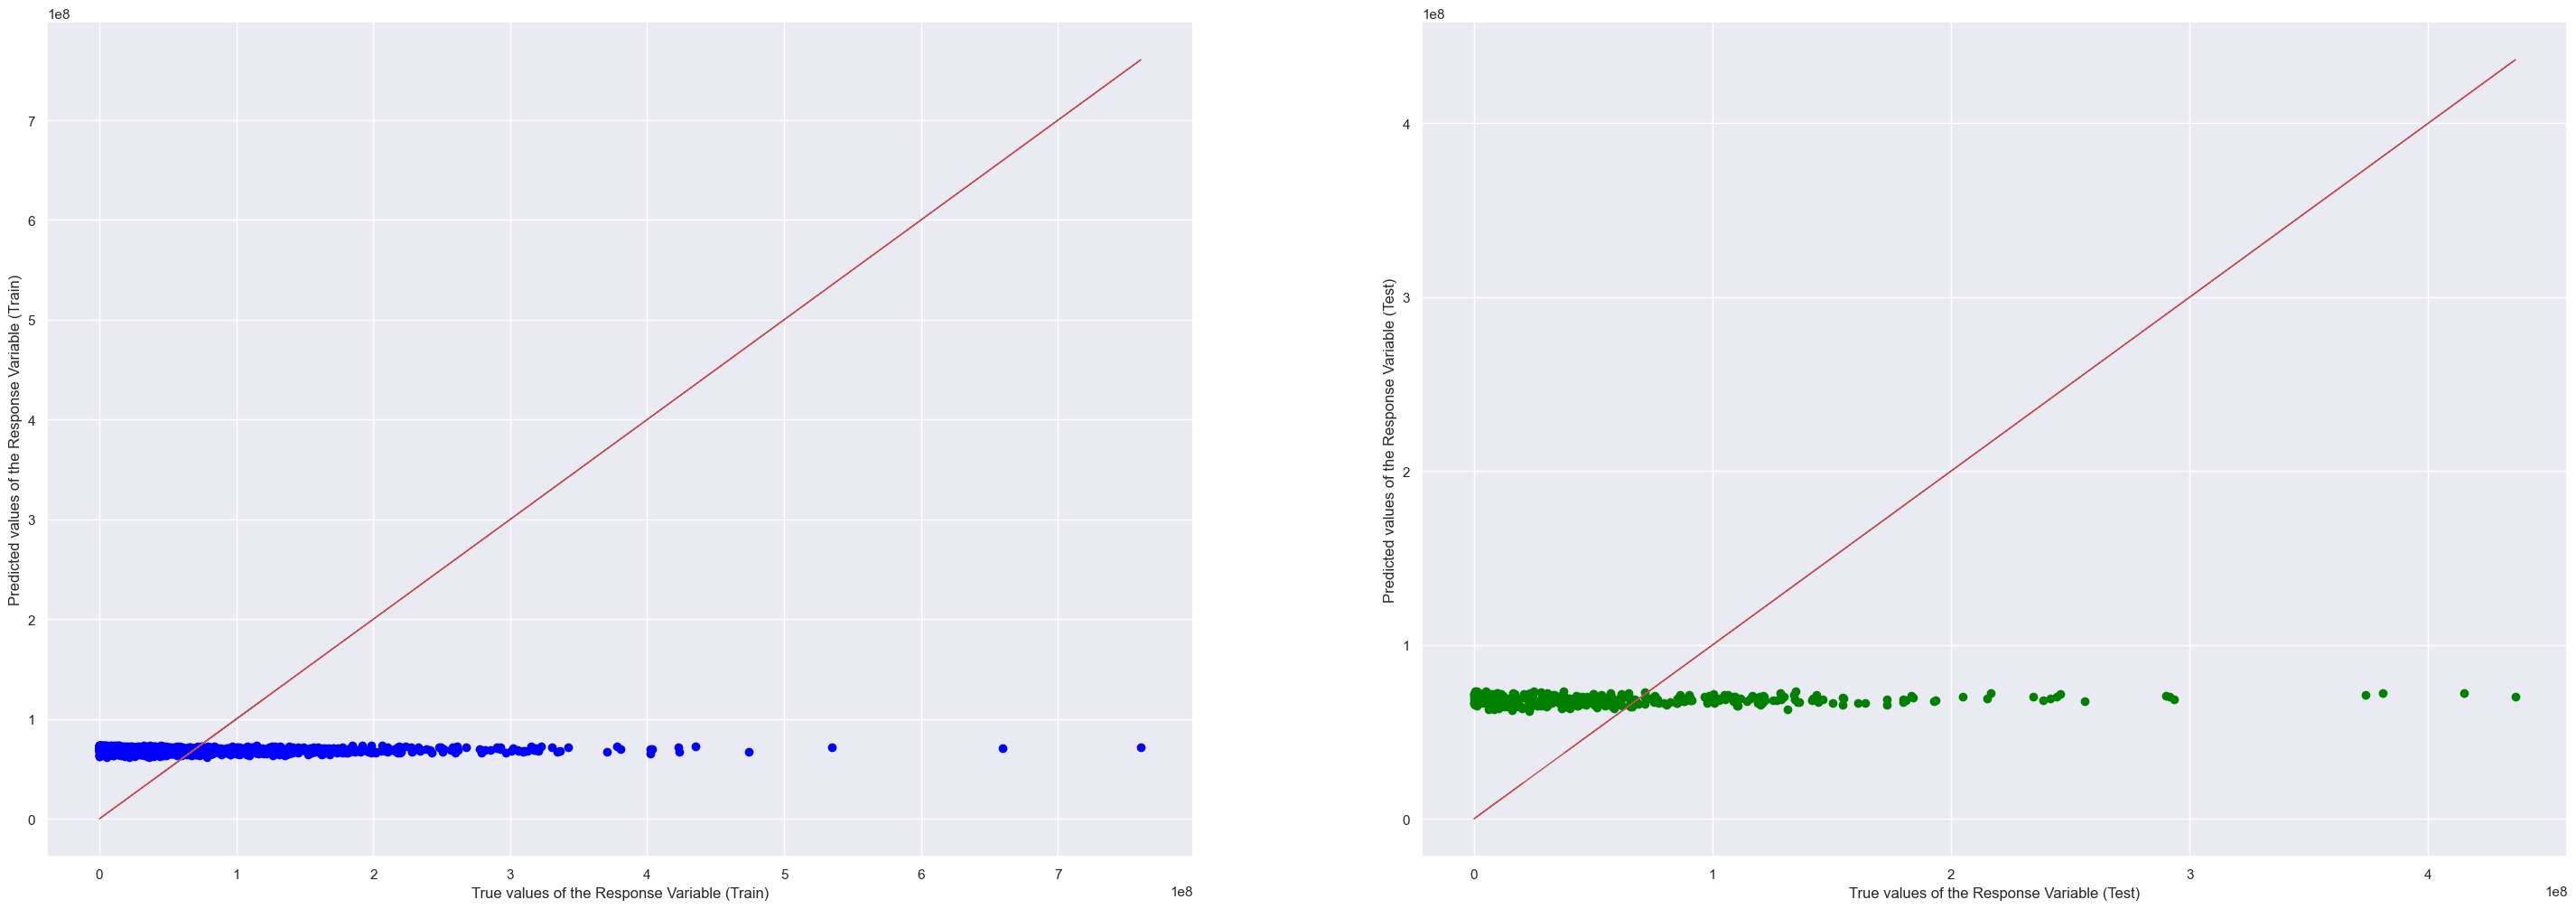

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

merged = pd.DataFrame(data[['Metascore', 'Gross']])
merged = merged.dropna(axis=0)
gross = pd.DataFrame(merged['Gross'])
metascore = pd.DataFrame(merged['Metascore'])

X_train, X_test, y_train, y_test = train_test_split(metascore, gross, test_size = 0.2)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(36, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()